In [1]:
import numpy as np
from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets
from scipy.linalg import svd
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from utils import Event


In [2]:
from sklearn.linear_model import Lasso, LassoCV, ElasticNetCV,ElasticNet
from sklearn import linear_model
n_features = 50
n_samples = 200
evt = Event(n_features=n_features, effective_rank=3, noise_level=1)
X0 = np.random.randn(1, n_features)
ntimes = 1000

In [3]:
def compute_risk(model, evt, ntimes, n_samples, X0):
    pred_model = []
    y0 = np.dot(X0, evt.coefficients)
    for i in range(ntimes):
        X, y = evt.sample(n_samples=n_samples)
        model.fit(X, y)
        pred = model.predict(X0)
        pred_model.append(pred)
    bias = np.mean(pred_model) - y0
    var = np.var(pred_model)
    risk = np.mean((pred_model - y0)**2)
    return (bias, var, risk)

In [4]:
X, y = evt.sample(n_samples=100)
lasso_alpha = LassoCV(cv=10,tol=0.00001,max_iter=100000).fit(X, y).alpha_
print('Best alpha for lasso is %f' % lasso_alpha)
elastnet_alpha = ElasticNetCV(cv=10,tol=0.00001,max_iter=100000).fit(X, y).alpha_
print('Best alpha for elastnet is %f' % elastnet_alpha)


Best alpha for lasso is 0.001056
Best alpha for elastnet is 0.000279


In [5]:
risk_elasticnet = compute_risk(linear_model.ElasticNet(alpha=elastnet_alpha), evt, ntimes, n_samples, X0)
risk_lasso = compute_risk(linear_model.Lasso(alpha=lasso_alpha), evt, ntimes, n_samples, X0)
output = "Bias: %f\tVariance: %f\tRisk: %f"

In [11]:
effective_ranks = range(2, 50)
bias_lasso_er = []
var_lasso_er = []
risk_lasso_er = []
bias_elasticnet_er = []
var_elasticnet_er = []
risk_elasticnet_er = []


In [12]:
for effective_rank in effective_ranks:
    evt = Event(n_features=n_features, effective_rank=effective_rank, noise_level=1)

    bias_elasticnet, var_elasticnet, risk_elasticnet = compute_risk(linear_model.ElasticNet(alpha=elastnet_alpha), evt, ntimes, n_samples, X0)
    bias_elasticnet_er.append(bias_elasticnet)
    var_elasticnet_er.append(var_elasticnet)
    risk_elasticnet_er.append(risk_elasticnet)
    
    bias_lasso, var_lasso, risk_lasso = compute_risk(linear_model.Lasso(alpha=lasso_alpha), evt, ntimes, n_samples, X0)
    bias_lasso_er.append(bias_lasso)
    var_lasso_er.append(var_lasso)
    risk_lasso_er.append(risk_lasso)

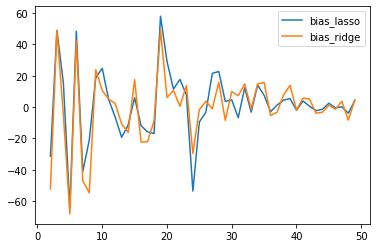

In [13]:
plt.plot(effective_ranks, bias_lasso_er, label='bias_lasso')
plt.plot(effective_ranks, bias_elasticnet_er, label='bias_ridge')
plt.legend()
plt.show()


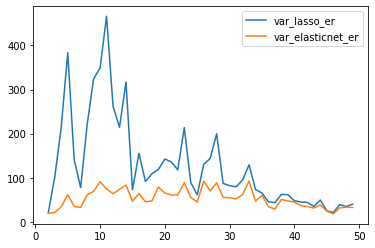

In [14]:
plt.figure()
plt.plot(effective_ranks, var_lasso_er, label='var_lasso_er')
plt.plot(effective_ranks, var_elasticnet_er, label='var_elasticnet_er')
plt.legend()
plt.show()

#the lasso gives an unbiased estimator that has a high variance when the effective rank is small. Anyway,elasticnet gives
#an unbiased estimator and has a low variance.It shows that when the effective rank becomes higher,the variance of model 
#lasso becomes higher,but the variance of model elasticnet is stable,
#so As the rank increases, the difference in the variance values between the two methods also increases,which means is more stable in high rank data.
#However when effective rank is to high,the variance of two methods will close to 0 .
#Elasticnet explains better when it is highly correlated.

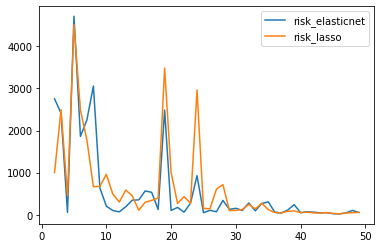

In [15]:
plt.figure()
plt.plot(effective_ranks, risk_elasticnet_er, label='risk_elasticnet')
plt.plot(effective_ranks, risk_lasso_er, label='risk_lasso')
plt.legend()
plt.show()


In [ ]:
#The risk of the two models is almost the same.